**Aim of the Project**: Download text from internet, process it and apply some maths to discover some interesting facts about written English

**Entropy** Here is related to information theory, introduced by Shanon who defined it as a metric of the amount of information or unpredictability of a signal or data set. The more unpredictable the signal, the more information it conveys, and the higher the entropy. Entropy is maximum when the probability of a binary event is 0.5

Entropy is computed as $H = - \sum_{i = 1}^np(x_i)log_2(p(x_i))$ where x represents data values and p is the probabilities of each event.

The steps of this project are:

1 - Download the text of "Time Machine" from Guttenberg library: www.gutenberg.org/files/35/35-0.txt

2 - Remove formatting characters

3 - Split the text into words and show the frequencies of word lengths

4 - Show the frequencies of letters

5 - Compute the entropy of each letter

6 - Compute lag-1 conditional Entropy

## Import Text from Web

In [1]:
import requests
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
book = requests.get("https://www.gutenberg.org/files/35/35-0.txt")

In [3]:
book # response of the server, nothing special here

<Response [200]>

In [4]:
text = book.text
print(type(text))
print(len(text))

<class 'str'>
204357


In [5]:
# Take a snippet
text[:3000]

'ï»¿The Project Gutenberg eBook of The Time Machine, by H. G. Wells\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: The Time Machine\r\n\r\nAuthor: H. G. Wells\r\n\r\nRelease Date: July, 1992 [eBook #35]\r\n[Most recently updated: October 22, 2020]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK THE TIME MACHINE ***\r\n\r\n\r\n\r\n\r\nThe Time Machine\r\n\r\nAn Invention\r\n\r\nby H. G. Wells\r\n\r\n\r\nCONTENTS\r\n\r\n I Introduction\r\n II The Machine\r\n III The Time Traveller Returns\r\n IV 

In [6]:
# Do the same
# book.encoding = book.apparent_encoding
# data = book.text
# data[:1000]

In [7]:
# Formatting characters we want to replace with space in the whole text
strings2replace = ['\r\n\r\nâ\x80\x9c','â\x80\x90c','â\x80\x90d',
                   '\r\n', '\r\n\r\n', 'â\x80\x94', 'â\x80\x99',
                   'â\x80\x98', 'â\x80\x9c', 'â\x80\x9d', '_', 
                   "UTF-8"]
strings2replace

['\r\n\r\nâ\x80\x9c',
 'â\x80\x90c',
 'â\x80\x90d',
 '\r\n',
 '\r\n\r\n',
 'â\x80\x94',
 'â\x80\x99',
 'â\x80\x98',
 'â\x80\x9c',
 'â\x80\x9d',
 '_',
 'UTF-8']

In [8]:
for str2match in strings2replace:
    regexp = re.compile(str2match)
    regexp.findall(text)
#    print(regexp)
    text = regexp.sub(" ", text)
text[:1000]

'ï»¿The Project Gutenberg eBook of The Time Machine, by H. G. Wells  This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook.  Title: The Time Machine  Author: H. G. Wells  Release Date: July, 1992 [eBook #35] [Most recently updated: October 22, 2020]  Language: English  Character set encoding:     *** START OF THE PROJECT GUTENBERG EBOOK THE TIME MACHINE ***     The Time Machine  An Invention  by H. G. Wells   CONTENTS   I Introduction  II The Machine  III The Time Traveller Returns  IV Time Travelling  V In the Golden Age  VI The Sunset of Mankind  VII A Sudden Shock  VIII Explanation  IX The Morlocks  X 

In [9]:
text = text[3:]
text[:1000]

'The Project Gutenberg eBook of The Time Machine, by H. G. Wells  This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook.  Title: The Time Machine  Author: H. G. Wells  Release Date: July, 1992 [eBook #35] [Most recently updated: October 22, 2020]  Language: English  Character set encoding:     *** START OF THE PROJECT GUTENBERG EBOOK THE TIME MACHINE ***     The Time Machine  An Invention  by H. G. Wells   CONTENTS   I Introduction  II The Machine  III The Time Traveller Returns  IV Time Travelling  V In the Golden Age  VI The Sunset of Mankind  VII A Sudden Shock  VIII Explanation  IX The Morlocks  X Whe

## Distribution of Word Lengths

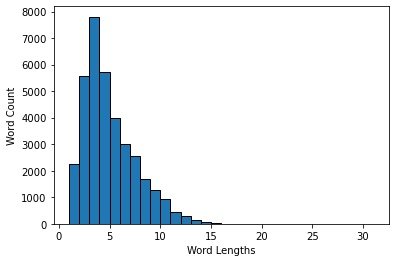

In [10]:
words = text.split()
word_length = np.zeros(len(words))
for i in range(len(words)):
    word_length[i] = len(words[i])
plt.hist(word_length, bins = 30, histtype='bar', ec='black')
plt.xlabel("Word Lengths")
plt.ylabel("Word Count")
plt.show()

In [11]:
len(words)

35810

In [12]:
len(text)

198515

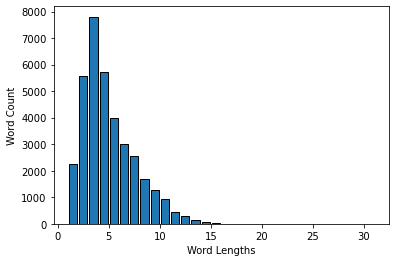

In [13]:
plt.hist(word_length, bins = 30, histtype='bar', ec='black', rwidth = 0.8)
plt.xlabel("Word Lengths")
plt.ylabel("Word Count")
plt.show()

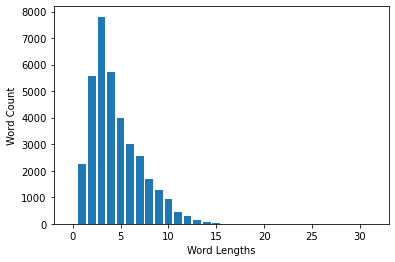

In [14]:
# We can make a barplot as well
wordcounts = np.zeros(32)
for wrd in words:
    wordcounts[len(wrd)] += 1
plt.bar(range(len(wordcounts)), wordcounts)
plt.xlabel("Word Lengths")
plt.ylabel("Word Count")
plt.show()

In [15]:
np.set_printoptions(suppress=True)
wordcounts

array([   0., 2266., 5570., 7804., 5729., 3980., 2996., 2551., 1700.,
       1277.,  929.,  449.,  294.,  156.,   57.,   26.,    8.,    5.,
          4.,    1.,    2.,    1.,    0.,    0.,    2.,    1.,    1.,
          0.,    0.,    0.,    0.,    1.])

## Letter Frequencies

Now we will compute letter frequency, not word frequency as in previous section

In [16]:
letters = list(text)
print(len(letters))
print(letters[:20])

198515
['T', 'h', 'e', ' ', 'P', 'r', 'o', 'j', 'e', 'c', 't', ' ', 'G', 'u', 't', 'e', 'n', 'b', 'e', 'r']


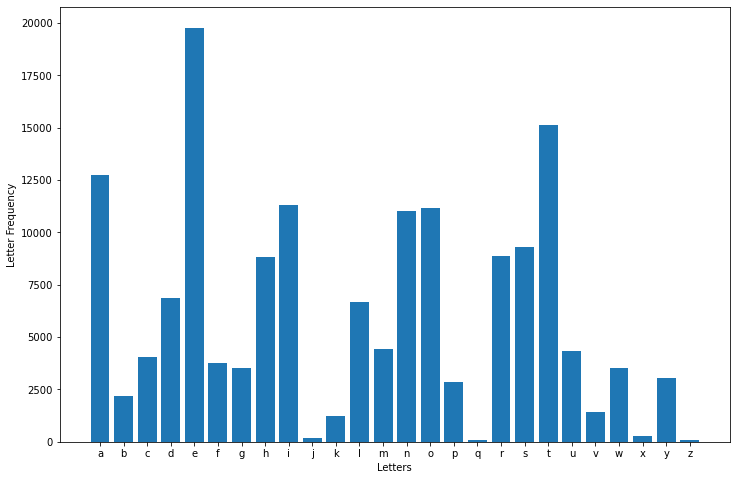

In [17]:
# My Version
import string
allletters = list(string.ascii_lowercase)
letters = np.zeros(len(allletters))
for j in range(len(allletters)):
    letters[j] = text.lower().count(allletters[j])
plt.figure(figsize = (12, 8))
plt.bar(list(allletters), letters)
plt.xlabel("Letters")
plt.ylabel("Letter Frequency")
plt.show()

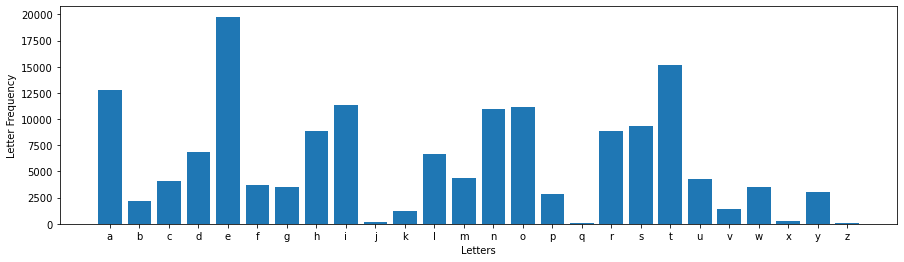

In [18]:
# Instructors version
letters = string.ascii_lowercase
numletters = len(letters)
lettercounts = np.zeros(numletters)
n = 0
for i in letters:
    lettercounts[n] = text.lower().count(i)
    n += 1
fig,ax = plt.subplots(1, figsize = (15, 4))
ax.bar(range(numletters), lettercounts)
ax.set_xticks(range(numletters))
ax.set_xticklabels(letters)
ax.set_xlabel("Letters")
ax.set_ylabel("Letter Frequency")
plt.show()

## Letter Entropy

Compute the entropy of english letters in this text:

1 - Convert letter frequencies into probabilities

2 - ompute the overall Entropy

3 - Replot the above plot by renaming the axis

In [19]:
# Convert from countro to probability: letter_counts/sum(all letter counts)
letterprob = lettercounts/sum(lettercounts)
np.sum(letterprob)

1.0

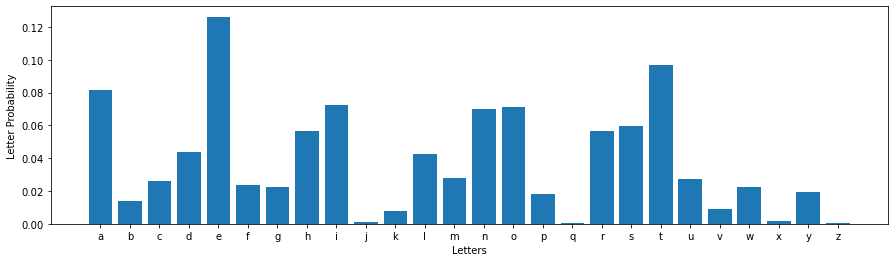

In [20]:
fig,ax = plt.subplots(1, figsize = (15, 4))
ax.bar(range(numletters), letterprob)
ax.set_xticks(range(numletters))
ax.set_xticklabels(letters)
ax.set_xlabel("Letters")
ax.set_ylabel("Letter Probability")
fig; # This makes python keep the figure in memory and we can generate it again

In [21]:
entropy = -np.sum(letterprob*np.log2(letterprob))
entropy

4.1730750946700885

In [22]:
# For cases when there are zeros, we get infinite. To avoid it
0 * np.log2(0 + np.finfo(float).eps)

-0.0

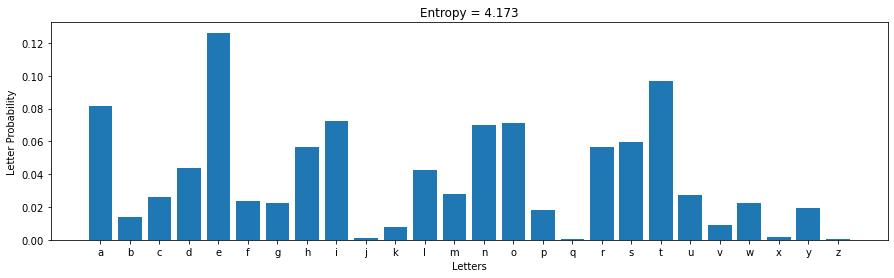

In [23]:
ax.set_title("Entropy = %.3f"%entropy)
fig # recall the figure from above

## Conditional Entropy

In the above section, we treated every leter as if it were an independent event from others, but in reality there are sequential probabilities of letters, i.e., certain letters have a higher probability of appearing after certain other letters. 

In [24]:
# Probability of current letter followed by another (letter pairs)
# Create a 26 x 26 matrix
probmat = np.zeros((numletters, numletters))

for i in range(len(text)-1):
    currlet = text[i]
    nextlet = text[i+1]
    if currlet in letters and nextlet in letters:
        probmat[letters.index(currlet), letters.index(nextlet)] += 1

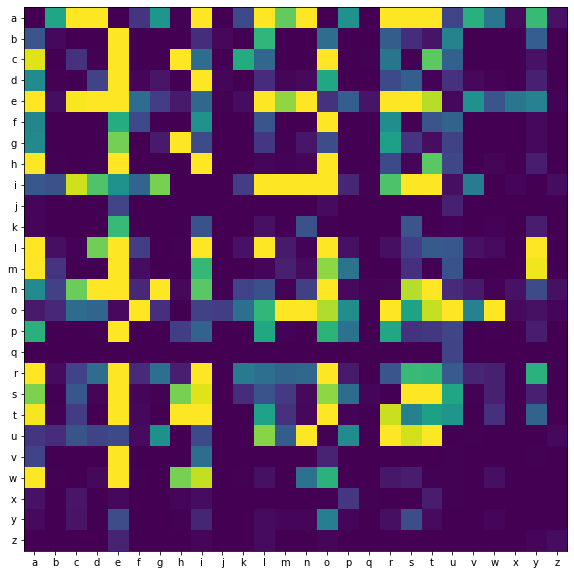

In [25]:
fig,ax = plt.subplots(1, figsize = (10, 10))
ax.imshow(probmat, vmax = 500)
ax.set_xticks(range(numletters))
ax.set_yticks(range(numletters))
ax.set_xticklabels(letters)
ax.set_yticklabels(letters)
plt.show()

In [26]:
# Compute Conditional Entropy for each individual letter
# Probability through each row from the heatmap shown above
# Many letters that follow a certain letter, high entropy avd vice versa

condentr = np.zeros(numletters)
for i in range(numletters):
    probs = probmat[i,:]
    probs = probs/np.sum(probs)
    condentr[i] = -np.sum(probs*np.log2(probs + np.finfo(float).eps))
condentr

array([ 3.64074099,  2.95010018,  3.24140006,  3.00655688,  3.6774802 ,
        3.02976822,  3.0902671 ,  2.07406242,  3.36534107,  1.45490467,
        2.33781232,  3.28422605,  2.75909226,  3.35378253,  3.70421941,
        3.30734043, -0.        ,  3.52314877,  3.36621189,  2.80569391,
        3.4621455 ,  1.15940487,  2.72231302,  2.57042486,  2.80682589,
        2.21839596])

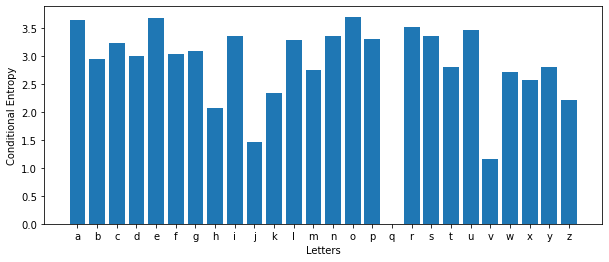

In [27]:
fig,ax = plt.subplots(1, figsize = (10, 4))
ax.bar(range(numletters), condentr)
ax.set_xticks(range(numletters))
ax.set_xticklabels(letters)
ax.set_xlabel("Letters")
ax.set_ylabel("Conditional Entropy")
plt.show()

## Bonus: Make a Word Cloud

In [28]:
# Word cloud of the text of the book
from wordcloud import WordCloud

In [29]:
wordcloud = WordCloud().generate(text)
type(wordcloud)

wordcloud.wordcloud.WordCloud

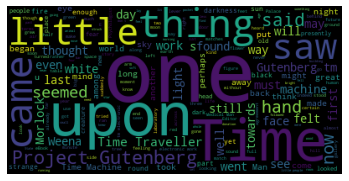

In [30]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()